In [1]:
from CommonImports import *
from TopologySelectionAutomation import *

np.set_printoptions(threshold=sys.maxsize)
%matplotlib widget

In [2]:
#folder for saving data and images 
base = os.getcwd()
folder_results = '/home/mcash/Desktop/LoonDataCollab-main/Data'
folder_images = '/home/mcash/Desktop/LoonDataCollab-main/Images'

## Only increasing number of nodes in the network
##### num_nodes = 4, 6, 8, 10 L_k = 48

In [12]:
#import capacities matrix or work with reduced matrix
os.chdir(base)
num_nodes = 6 #!--change this number and re-run cells--! 
capacity = np.load('capacity_array.npy') 
capacities, flt_ids = pruneCapacity(num_nodes, capacity) 

In [13]:
print(capacities.shape)
print(flt_ids)

(23384, 6, 6)
['LN-172' 'LN-179' 'LN-180' 'LN-201' 'LN-207' 'LN-214']


In [14]:
capacity = capacities[5000, :, :]
print(capacity)

[[  0. 390.   0. 195. 987. 390.]
 [390.   0.   0. 987. 588. 987.]
 [  0.   0.   0.   0.   0.   0.]
 [195. 987.   0.   0. 390. 987.]
 [987. 588.   0. 390.   0. 588.]
 [390. 987.   0. 987. 588.   0.]]


Run through time

In [17]:
source = np.where(flt_ids == 'LN-172')[0][0] + 1
dest = np.where(flt_ids == 'LN-207')[0][0] + 1 

T=2

rho_hist = np.zeros(capacities.shape[0],)
topo_hist = np.zeros((capacities.shape[0], num_nodes, num_nodes-1))
L_k = 48.0

start_time = time.time()
for i in range(0, capacities.shape[0]):
  
    rho, topology_vals = singleCommodityFlow(num_nodes, source, dest, L_k, T, capacities[i, :, :])
    rho_hist[i] = rho
    topo_hist[i] = topology_vals
    
    if i % 4000 == 0: 
        print('iteration = ', i)
        print('elpased time = ', time.time()-start_time)
print('finished')

#save results 
os.chdir(folder_results)
fname = 'rho_hist_SCF_numNodes_%s.npy' % num_nodes 
np.save(fname, rho_hist) 

iteration =  0
elpased time =  27.802915334701538
The problem does not have an optimal solution.


I0000 00:00:1698166392.164202   72453 sigint.cc:31] ^C pressed 1 times. Interrupting the solver. Press 3 times to force termination.


TypeError: cannot unpack non-iterable NoneType object

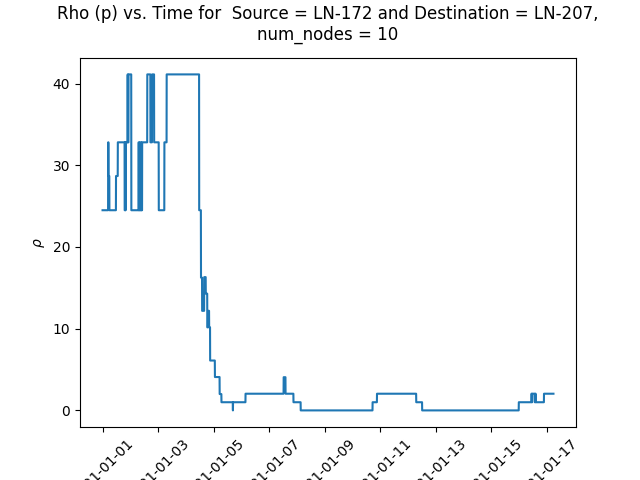

In [22]:
fname = 'Rho vs. Time Nodes = %s.png' % (num_nodes)
fig_title = 'Rho (p) vs. Time for  Source = %s and Destination = %s, num_nodes = %s' %(flt_ids[source-1], flt_ids[dest-1], num_nodes)

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel(r"$\rho$")
ax.set_title(fig_title, pad=15, wrap=True)

ax.plot(times, rho_hist, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
os.chdir(folder_images)
plt.savefig(fname, dpi = 300, bbox_inches='tight')

### Import Results to Plot Without Re-Running Optimizer

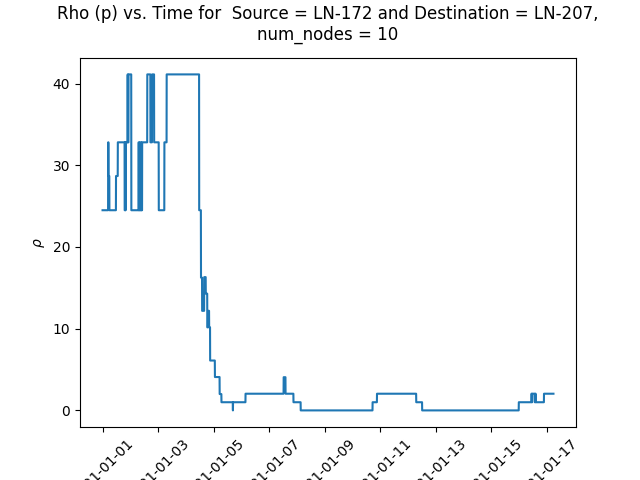

In [12]:
#import capacities matrix or work with reduced matrix
os.chdir(base)
num_nodes = 10 #!--change this number and re-run cells--! 
capacity = np.load('capacity_array.npy') 
capacities, flt_ids = pruneCapacity(num_nodes, capacity) 

source = np.where(flt_ids == 'LN-172')[0][0] + 1
dest = np.where(flt_ids == 'LN-207')[0][0] + 1 
os.chdir(folder_results)
fname = 'rho_hist_SCF_numNodes_%s.npy' % num_nodes 
rho_hist = np.load(fname)

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]

fig_title = 'Rho (p) vs. Time for  Source = %s and Destination = %s, num_nodes = %s' %(flt_ids[source-1], flt_ids[dest-1], num_nodes)

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel(r"$\rho$")
ax.set_title(fig_title, pad=15, wrap=True)

ax.plot(times, rho_hist, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

## Testing Multi-Commodity Flow
#### num_nodes = 6,8,10 L_k = [48, 48]

In [3]:
#import capacities matrix or work with reduced matrix
os.chdir(base)
num_nodes = 6 #!--change this number and re-run cells--! 
capacity = np.load('capacity_array.npy') 
capacities, flt_ids = pruneCapacity(num_nodes, capacity) 

In [4]:
print(capacities.shape)
print(flt_ids)

(23384, 6, 6)
['LN-172' 'LN-179' 'LN-180' 'LN-201' 'LN-207' 'LN-214']


In [17]:
capacity = capacities[1000, :, :]
print(capacity)

[[  0.  98. 390. 390. 588. 987.]
 [ 98.   0. 390.  48.  98.  98.]
 [390. 390.   0.  98. 195. 195.]
 [390.  48.  98.   0. 987. 588.]
 [588.  98. 195. 987.   0. 588.]
 [987.  98. 195. 588. 588.   0.]]


#### Want to check that source and destination pairs are valid throughout time, otherwise pick another pairing

In [21]:
#define source and destination -- change string based on flights
source = [np.where(flt_ids == 'LN-172')[0][0] + 1, np.where(flt_ids == 'LN-172')[0][0] + 1]
dest = [np.where(flt_ids == 'LN-207')[0][0] + 1, np.where(flt_ids == 'LN-201')[0][0] + 1]

#check if valid pairing -- still thinking about this


In [22]:
T=2

rho_hist = np.zeros(capacities.shape[0],)
L_k = [48.0, 48.0]

start_time = time.time()
for i in range(0, capacities.shape[0]):
  
    rho = MultiCommodityFlow(num_nodes, source, dest, L_k, T, capacities[i, :, :])
    rho_hist[i] = rho
    
    if i % 4000 == 0: 
        print('iteration = ', i)
        print('elpased time = ', time.time()-start_time)
print('finished')

#save results 
os.chdir(folder_results)
fname = 'rho_hist_MCF_numNodes_%s.npy' % num_nodes 
np.save(fname, rho_hist) 

iteration =  0
elpased time =  0.011461257934570312
iteration =  4000
elpased time =  123.65800547599792
iteration =  8000
elpased time =  204.0939383506775
iteration =  12000
elpased time =  228.67918753623962
iteration =  16000
elpased time =  250.5059311389923
iteration =  20000
elpased time =  276.501501083374
finished


### Plotting $ \rho $ for MCF Solution

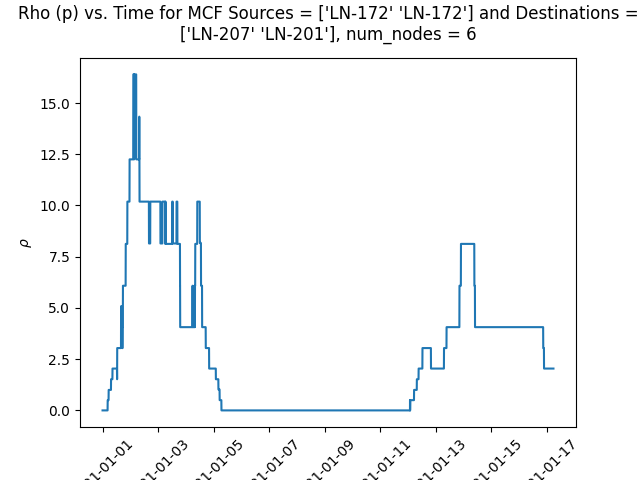

In [ ]:
#for figure titles
idx_src = [x-1 for x in source] 
idx_dest = [x-1 for x in dest] 

fname = 'Rho vs. Time Nodes = %s MCF.png' % (num_nodes)
fig_title = 'Rho (p) vs. Time for MCF Sources = %s and Destinations = %s, num_nodes = %s' %(flt_ids[idx_src], flt_ids[idx_dest], num_nodes)

times = np.arange(np.datetime64('2021-01-01'),
                  np.datetime64('2021-01-18'), np.timedelta64(1, 'm'))

times = times[1:capacities.shape[0]+1]

fig, ax = plt.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel(r"$\rho$")
ax.set_title(fig_title, pad=15, wrap=True)

ax.plot(times, rho_hist, label ='p')
ax.tick_params(axis='x', labelrotation = 45)
os.chdir(folder_images)
plt.savefig(fname, dpi = 300, bbox_inches='tight')